In [17]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [18]:
tips_df = sns.load_dataset('tips')


In [19]:
tips_df.head(5)

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


In [20]:
tips_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 244 entries, 0 to 243
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   total_bill  244 non-null    float64 
 1   tip         244 non-null    float64 
 2   sex         244 non-null    category
 3   smoker      244 non-null    category
 4   day         244 non-null    category
 5   time        244 non-null    category
 6   size        244 non-null    int64   
dtypes: category(4), float64(2), int64(1)
memory usage: 7.4 KB


In [21]:
tips_df.isnull().sum()

total_bill    0
tip           0
sex           0
smoker        0
day           0
time          0
size          0
dtype: int64

Text(0.5, 1.0, 'Distribution of Tip Amounts')

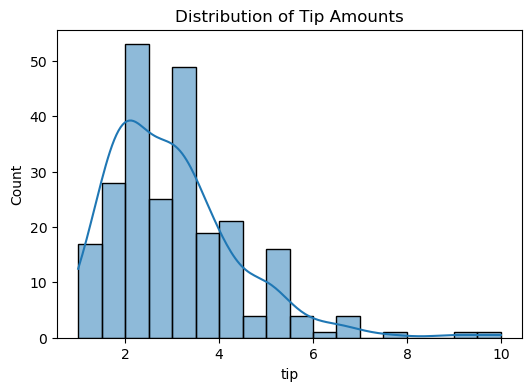

In [22]:
# Distribution of tip amounts
plt.figure(figsize=(6,4))
sns.histplot(tips_df['tip'],kde=True)
plt.title('Distribution of Tip Amounts')

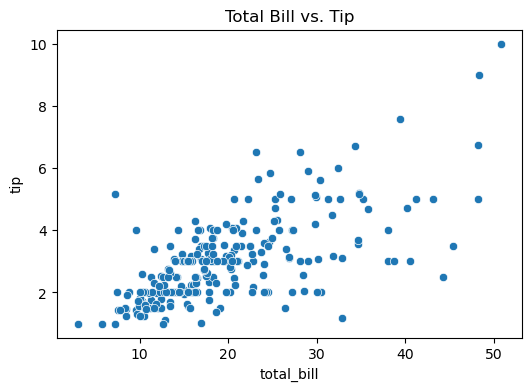

In [23]:
# Relationship between total bill and tip
plt.figure(figsize=(6,4))
sns.scatterplot(data=tips_df, x='total_bill', y='tip')
plt.title('Total Bill vs. Tip')
plt.show()

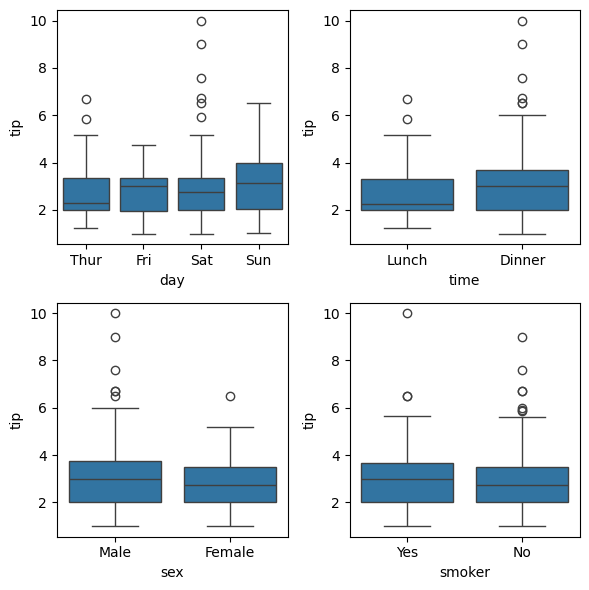

In [24]:
# Box plots for categorical variables
fig, axes = plt.subplots(2, 2, figsize=(6, 6))
sns.boxplot(x='day', y='tip', data=tips_df, ax=axes[0, 0])
sns.boxplot(x='time', y='tip', data=tips_df, ax=axes[0, 1])
sns.boxplot(x='sex', y='tip', data=tips_df, ax=axes[1, 0])
sns.boxplot(x='smoker', y='tip', data=tips_df, ax=axes[1, 1])
plt.tight_layout()
plt.show()

Featuren Encoding

In [25]:
# Categorical encoding for 'sex', 'smoker', and 'time'
tips_df['sex'] = tips_df['sex'].cat.codes
tips_df['smoker'] = tips_df['smoker'].cat.codes
tips_df['time'] = tips_df['time'].cat.codes

# One-hot encoding for 'day'
tips_df = pd.get_dummies(tips_df, columns=['day'], prefix='day')


In [27]:
tips_df.head()

,total_bill,tip,sex,smoker,time,size,day_Thur,day_Fri,day_Sat,day_Sun
0,16.99,1.01,1,1,1,2,False,False,False,True
1,10.34,1.66,0,1,1,3,False,False,False,True
2,21.01,3.50,0,1,1,3,False,False,False,True
3,23.68,3.31,0,1,1,2,False,False,False,True
4,24.59,3.61,1,1,1,4,False,False,False,True


Preaparing for Modeling

In [28]:
X = tips_df.drop('tip', axis=1)
Y = tips_df['tip']

print("Features:", X.columns)

Features: Index(['total_bill', 'sex', 'smoker', 'time', 'size', 'day_Thur', 'day_Fri',
       'day_Sat', 'day_Sun'],
      dtype='object')


Correlation Analysis

In [29]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [30]:
# Calculate correlations
corr_matrix = tips_df.corr()

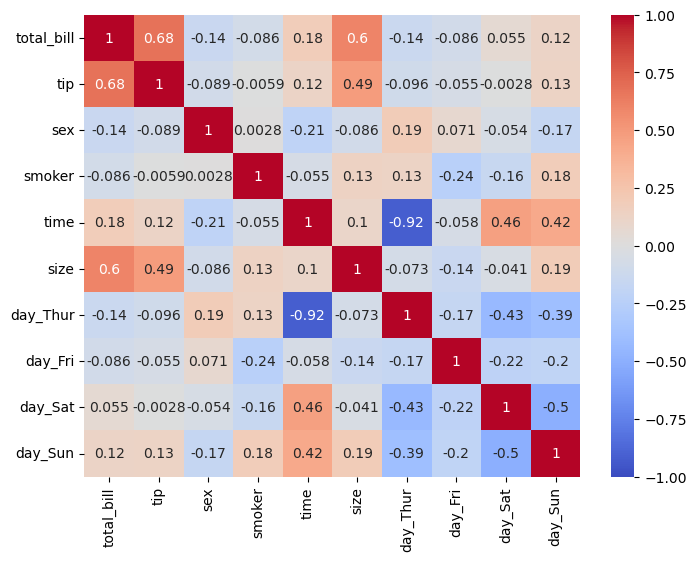

In [31]:
# PLot the heat map
plt.figure(figsize=(8,6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', vmin=-1
            ,vmax=1, center=0)
plt.show()

In [33]:
# Print the correlations with 'tip'
corr_matrix['tip'].sort_values(ascending=False)

tip           1.000000
total_bill    0.675734
size          0.489299
day_Sun       0.125114
time          0.121629
day_Sat      -0.002790
smoker       -0.005929
day_Fri      -0.055463
sex          -0.088862
day_Thur     -0.095879
Name: tip, dtype: float64

Visualizing Relationships

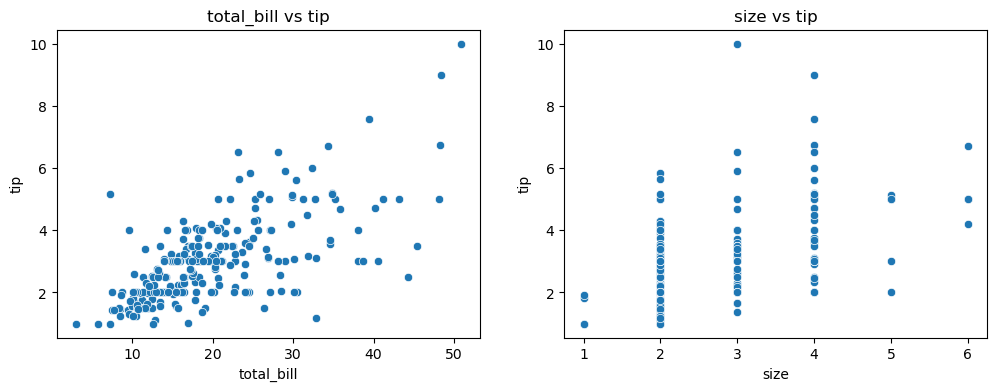

In [34]:
numerical_features = ['total_bill', 'size']
fig, axes = plt.subplots(1,2, figsize=(12,4))

for i, feature in enumerate(numerical_features):
       sns.scatterplot(x=feature, y='tip', data=tips_df, ax=axes[i])
       axes[i].set_title(f'{feature} vs tip')

#### Selecting Initial Features


In [37]:
selected_features = ['total_bill', 'size', 'time', 'day_Sat', 'day_Sun']
X_selected = tips_df[selected_features]

print("selected features:", X_selected.columns)

selected features: Index(['total_bill', 'size', 'time', 'day_Sat', 'day_Sun'], dtype='object')


1. Tip Percentage

In [38]:
tips_df['tip_percentage'] = tips_df['tip'] / tips_df['total_bill'] * 100
tips_df

,total_bill,tip,sex,smoker,time,size,day_Thur,day_Fri,day_Sat,day_Sun,tip_percentage
0,16.99,1.01,1,1,1,2,False,False,False,True,5.944673
1,10.34,1.66,0,1,1,3,False,False,False,True,16.054159
2,21.01,3.50,0,1,1,3,False,False,False,True,16.658734
3,23.68,3.31,0,1,1,2,False,False,False,True,13.978041
4,24.59,3.61,1,1,1,4,False,False,False,True,14.680765
...,...,...,...,...,...,...,...,...,...,...,...
239,29.03,5.92,0,1,1,3,False,False,True,False,20.392697
240,27.18,2.00,1,0,1,2,False,False,True,False,7.358352
241,22.67,2.00,0,0,1,2,False,False,True,False,8.822232
242,17.82,1.75,0,1,1,2,False,False,True,False,9.820426


2. Per Person Total

In [39]:
tips_df['per_person_total'] = tips_df['total_bill'] / tips_df['size']
tips_df 

,total_bill,tip,sex,smoker,time,size,day_Thur,day_Fri,day_Sat,day_Sun,tip_percentage,per_person_total
0,16.99,1.01,1,1,1,2,False,False,False,True,5.944673,8.495000
1,10.34,1.66,0,1,1,3,False,False,False,True,16.054159,3.446667
2,21.01,3.50,0,1,1,3,False,False,False,True,16.658734,7.003333
3,23.68,3.31,0,1,1,2,False,False,False,True,13.978041,11.840000
4,24.59,3.61,1,1,1,4,False,False,False,True,14.680765,6.147500
...,...,...,...,...,...,...,...,...,...,...,...,...
239,29.03,5.92,0,1,1,3,False,False,True,False,20.392697,9.676667
240,27.18,2.00,1,0,1,2,False,False,True,False,7.358352,13.590000
241,22.67,2.00,0,0,1,2,False,False,True,False,8.822232,11.335000
242,17.82,1.75,0,1,1,2,False,False,True,False,9.820426,8.910000


3. Is Weekend

In [40]:
tips_df['is_weekend'] = tips_df['day_Sat'] | tips_df['day_Sun']
tips_df 

,total_bill,tip,sex,smoker,time,size,day_Thur,day_Fri,day_Sat,day_Sun,tip_percentage,per_person_total,is_weekend
0,16.99,1.01,1,1,1,2,False,False,False,True,5.944673,8.495000,True
1,10.34,1.66,0,1,1,3,False,False,False,True,16.054159,3.446667,True
2,21.01,3.50,0,1,1,3,False,False,False,True,16.658734,7.003333,True
3,23.68,3.31,0,1,1,2,False,False,False,True,13.978041,11.840000,True
4,24.59,3.61,1,1,1,4,False,False,False,True,14.680765,6.147500,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...
239,29.03,5.92,0,1,1,3,False,False,True,False,20.392697,9.676667,True
240,27.18,2.00,1,0,1,2,False,False,True,False,7.358352,13.590000,True
241,22.67,2.00,0,0,1,2,False,False,True,False,8.822232,11.335000,True
242,17.82,1.75,0,1,1,2,False,False,True,False,9.820426,8.910000,True


4. Party Size Category

In [41]:
tips_df['party_size_category'] = pd.cut(tips_df['size'], bins=[0, 3, 6, np.inf], labels=['Small', 'Medium', 'Large'])
tips_df = pd.get_dummies(tips_df, columns=['party_size_category'], prefix='party')
tips_df

,total_bill,tip,sex,smoker,time,size,day_Thur,day_Fri,day_Sat,day_Sun,tip_percentage,per_person_total,is_weekend,party_Small,party_Medium,party_Large
0,16.99,1.01,1,1,1,2,False,False,False,True,5.944673,8.495000,True,True,False,False
1,10.34,1.66,0,1,1,3,False,False,False,True,16.054159,3.446667,True,True,False,False
2,21.01,3.50,0,1,1,3,False,False,False,True,16.658734,7.003333,True,True,False,False
3,23.68,3.31,0,1,1,2,False,False,False,True,13.978041,11.840000,True,True,False,False
4,24.59,3.61,1,1,1,4,False,False,False,True,14.680765,6.147500,True,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
239,29.03,5.92,0,1,1,3,False,False,True,False,20.392697,9.676667,True,True,False,False
240,27.18,2.00,1,0,1,2,False,False,True,False,7.358352,13.590000,True,True,False,False
241,22.67,2.00,0,0,1,2,False,False,True,False,8.822232,11.335000,True,True,False,False
242,17.82,1.75,0,1,1,2,False,False,True,False,9.820426,8.910000,True,True,False,False


In [42]:
party_size_columns = tips_df.filter(like='party_').columns.tolist()
tips_df[['tip', 'tip_percentage', 'per_person_total', 'is_weekend'] + party_size_columns].head()

,tip,tip_percentage,per_person_total,is_weekend,party_Small,party_Medium,party_Large
0,1.01,5.944673,8.495000,True,True,False,False
1,1.66,16.054159,3.446667,True,True,False,False
2,3.50,16.658734,7.003333,True,True,False,False
3,3.31,13.978041,11.840000,True,True,False,False
4,3.61,14.680765,6.147500,True,False,True,False


## Updating Selected Features

In [43]:
selected_features = ['total_bill', 'size', 'time', 'day_Sat', 'day_Sun', 'tip_percentage', 'per_person_total', 'is_weekend'] + [col for col in tips_df.columns if col.startswith('party_')]
X_selected = tips_df[selected_features]

print("Updated selected features:", X_selected.columns)

Updated selected features: Index(['total_bill', 'size', 'time', 'day_Sat', 'day_Sun', 'tip_percentage',
       'per_person_total', 'is_weekend', 'party_Small', 'party_Medium',
       'party_Large'],
      dtype='object')


## Preparing Final Dataset for Modeling

In [44]:
from sklearn.model_selection import train_test_split

X = X_selected.astype(np.float64)
y = tips_df['tip'].astype(np.float64)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print("Training set shape:", X_train.shape)
print("Testing set shape:", X_test.shape)

Training set shape: (195, 11)
Testing set shape: (49, 11)


In [45]:
assert X_train.shape[0] + X_test.shape[0] == tips_df.shape[0], "Training and testing sets do not match the original dataset size"
assert X_train.shape[1] == X_test.shape[1], "Training and testing sets do not have the same number of features"


In [46]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

def add_bias_column(X):
       return np.c_[np.ones((X.shape[0], 1)), X]

# Add a column of ones to X for the intercept term
X_train = add_bias_column(X_train)
X_test = add_bias_column(X_test)

X_train = y_train.values.reshape(-1,1)
X_test = y_test.values.reshape(-1,1)

Multiple Linear Regression

In [47]:
from sklearn.linear_model import LinearRegression
import numpy as np

# Initialize the mode
lr_model = LinearRegression()

# Fit the model
lr_model.fit(X_train, y_train)

LinearRegression()

Examining the Model

In [48]:
# print the intercept and coefficients
print("Intercept:", lr_model.intercept_)
print("Coefficients:", lr_model.coef_)

for feature, coef in zip(X.columns, lr_model.coef_):
       print(f"Feature: {feature}, Coefficient: {coef}")

Intercept: 8.881784197001252e-16
Coefficients: [1.]
Feature: total_bill, Coefficient: 0.9999999999999998


# Model Evaluation


In [53]:
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np

def evaluate_model(model, X_train, y_train, X_test, y_test):
       # Training set performance
       y_train_pred = model.predict(X_train)
       mse_train = mean_squared_error(y_train, y_train_pred)
       rmse_train = np.sqrt(mse_train)
       r2_train = r2_score(y_train, y_train_pred)

       # Test set performance
       y_test_pred = model.predict(X_test)
       mse_test = mean_squared_error(y_test, y_test_pred)
       rmse_test = np.sqrt(mse_test)
       r2_test = r2_score(y_test, y_test_pred)
              
       print("Training Set Results:")
       print(f"Mean Squared Error: {mse_train}")
       print(f"R-squared: {r2_train}")
       print(f"Root Mean Squared Error: {rmse_train}")
       print("\nTest Set Results:")
       print(f"Mean Squared Error: {mse_test}")
       print(f"R-squared: {r2_test}")
       print(f"Root Mean Squared Error: {rmse_test}")
       return mse_train, rmse_train, r2_train, mse_test, rmse_test, r2_test

# Evaluate the model
mse_train, rmse_train, r2_train, mse_test, rmse_test, r2_test = evaluate_model(lr_model, X_train, y_train, X_test, y_test)

Training Set Results:
Mean Squared Error: 1.2894841719958847e-31
R-squared: 1.0
Root Mean Squared Error: 3.590938835452206e-16

Test Set Results:
Mean Squared Error: 1.640106218763073e-31
R-squared: 1.0
Root Mean Squared Error: 4.0498224884099216e-16
